In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Lab 6 - Fisher's Linear Discriminant and Logistic Regression
- For equations, refer to Bishop's book, Section 4.1.4 and the slides

# Part I - Fisher's Linear Discriminant for Binary Classification (2 classes)

## Data Generation and Visualisation
- First we'll use scikit-learn to generate 2 blobs of data in 2D, using the [make_blobs()](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) function.
- The data consists of 600 points divided into 2 classes, 0 and 1.

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=600, centers=2, n_features=2, random_state=0)

Let's confirm the data has two classes

In [4]:
np.unique(y)

array([0, 1])

## Exercise 1
- Now create a scatter plot to visualise the generated data. 
- Make sure to paint each point based on the class they belong to, as shown in the Figure below.

<Axes: xlabel='X', ylabel='Y'>

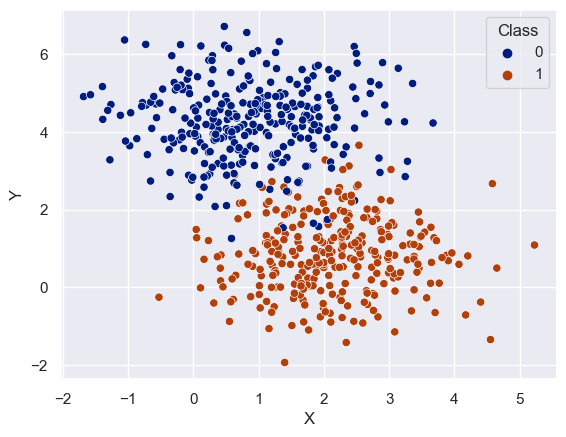

In [5]:
# your code goes here:
sns.set_theme(palette = sns.color_palette("dark", 3))
plot_df = pd.DataFrame({"X": X[:, 0], "Y": X[:,1], "Class":y})
sns.scatterplot(data = plot_df, x = "X", y = "Y", hue = "Class")

## Exercise 2
* Now plot a histogram of the data projected on each of the 2 dimensions of $X$ ($0$ and $1$)

As an example, below is a figure that shows the projection on dimension $1$.

_Tips:_ 
* You can either use `histplot()` to generate the plot, in which case it might be easier to pack $X$ and $y$ into a pandas DataFrame.
* Alternatively, considering that you will generate this plot many times throughout this lab, you can write a function that takes the projected vector and the class labels.
* Use 30 bins to obtain a similar plot.

<Axes: title={'center': 'Projection on axis 1'}, xlabel='Y', ylabel='Count'>

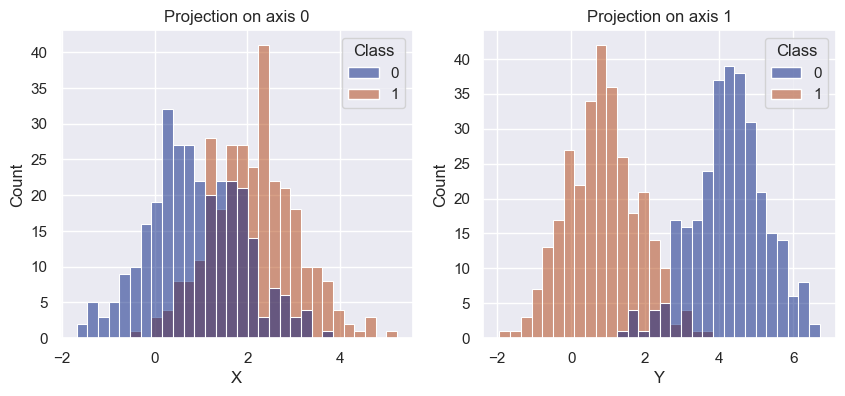

In [6]:
# your code goes here
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].set_title("Projection on axis 0")
axes[1].set_title("Projection on axis 1")
sns.histplot(ax=axes[0], data = plot_df, x = "X", hue = "Class", bins = 30)
sns.histplot(ax=axes[1], data = plot_df, x = "Y", hue = "Class", bins = 30)

## Exercise 3 - Implement Fisher's linear discriminant

* Use numpy to calculate $\vec{w}$.
* Plot the data (as you did in Exercise 1), and add a line on the direction of $\vec{w}$ (reference Figure below).
* Project the points onto the calculated vector, and plot the projection (as you did in Exercise 2) (reference Figure below).

In [7]:
# your code goes here:
c0 = plot_df[plot_df["Class"] == 0]
xc0 = c0.iloc[:,0:2].values
xc0_mean = np.mean(xc0, axis=0).reshape(-1,1)

c1 = plot_df[plot_df["Class"] == 1]
xc1 = c1.iloc[:,0:2].values
xc1_mean = np.mean(xc1, axis=0).reshape(-1,1)

sw = np.zeros((2,2))
for i in range(xc0.shape[0]):
    sw += np.dot((xc0[i].reshape(-1,1) - xc0_mean), (xc0[i].reshape(-1,1) - xc0_mean).transpose())

for i in range(xc1.shape[0]):
    sw += np.dot((xc1[i].reshape(-1,1) - xc1_mean), (xc1[i].reshape(-1,1) - xc1_mean).transpose())

w = np.dot(np.linalg.inv(sw), (xc1_mean - xc0_mean))
w

array([[ 0.00223896],
       [-0.00597548]])

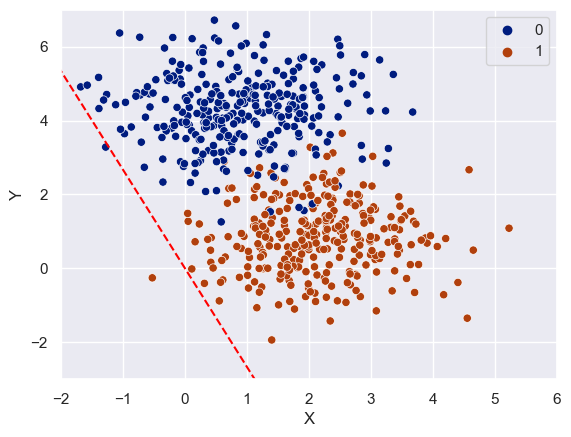

In [8]:
# your code goes here:
fig, ax = plt.subplots()
ax.set_xlim(-2, 6)
ax.set_ylim(-3, 7)

ax = sns.scatterplot(data = plot_df, x = "X", y = "Y", hue = "Class", ax=ax)

w2 = w*1000
df = {"x": [-w2[0, 0], w2[0, 0]], "y": [-w2[1, 0], w2[1, 0]]}
ax = sns.lineplot(data = df, x="x", y="y", ax=ax, color="r", linestyle="dashed")

<Axes: xlabel='w_projection', ylabel='Count'>

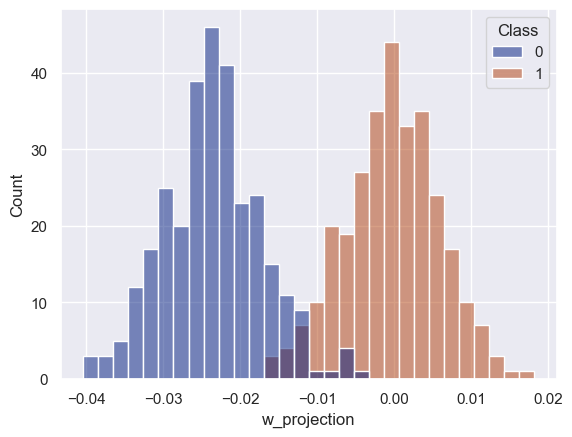

In [9]:
# your code goes here:
w_proj = np.dot(X, w)
plot_df["w_projection"] = w_proj
sns.histplot(data = plot_df, x = "w_projection", hue = "Class", bins = 30)

## Exercise 4

* In this exercise you will use the `RidgeClassifier` from sklearn (as shown below) to obtain the class predictions from different types of projections:
    * component 0 of the data
    * component 1 of the data
    * the calculated vector $\vec{w}$
    
* Calculate the accuracy of these predictions using `accuracy_score` from sklearn.

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier

In [11]:
# Follow this structure for each projection:
# r = RidgeClassifier()
# r.fit(projection, y)
# predicted_y = r.predict(projection)
# accuracy = accuracy_score(predicted_y, y)

In [37]:
# your code goes here:
r = RidgeClassifier()

r.fit(X[:, 0].reshape(-1,1), y)
predicted_y = r.predict(X[:, 0].reshape(-1,1))
accuracy = accuracy_score(predicted_y, y)
print("Projection on first dimension: Accuracy =", accuracy)

r.fit(X[:, 1].reshape(-1,1), y)
predicted_y = r.predict(X[:, 1].reshape(-1,1))
accuracy = accuracy_score(predicted_y, y)
print("Projection on second dimension: Accuracy =", accuracy)

r.fit(w_proj, y)
predicted_y = r.predict(w_proj)
accuracy = accuracy_score(predicted_y, y)
print("Projection on Fisher's Linear Discriminant: Accuracy =", accuracy)

Projection on first dimension: Accuracy = 0.7366666666666667
Projection on second dimension: Accuracy = 0.955
Projection on Fisher's Linear Discriminant: Accuracy = 0.965


# Part II - Generalised Linear Discriminant (multi-class)

**NOTE:** For this part you will be using a multi-class estimator from scikit-learn (read the [documentation](https://scikit-learn.org/stable/modules/lda_qda.html#lda-qda)).

## Exercise 1 - Generate data

* Generate a 3 classes dataset in 2D, with the same rules as before (make 300 points per class)
* Plot the data and then similar histograms (on each dimension) as Part I Exercises 1 and 2.

In [13]:
X2, y2 = make_blobs(n_samples=900, centers=3, n_features=2, random_state=0)
np.unique(y2)

array([0, 1, 2])

<Axes: xlabel='X', ylabel='Y'>

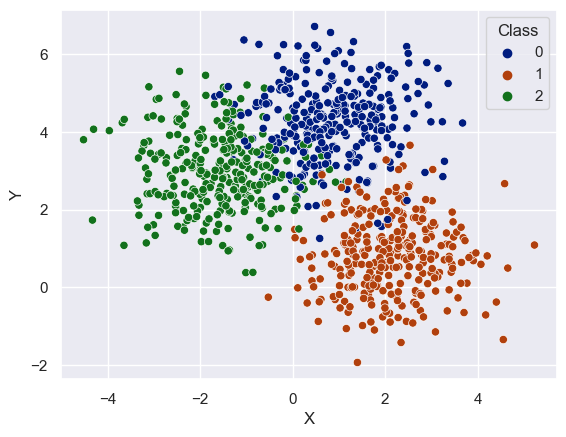

In [14]:
# your code goes here: 
plot_df2 = data = pd.DataFrame({"X": X2[:, 0], "Y": X2[:,1], "Class":y2})
sns.scatterplot(data = plot_df2, x = "X", y = "Y", hue = "Class", palette = sns.color_palette("dark", 3))

<Axes: title={'center': 'Projection on axis 1'}, xlabel='Y', ylabel='Count'>

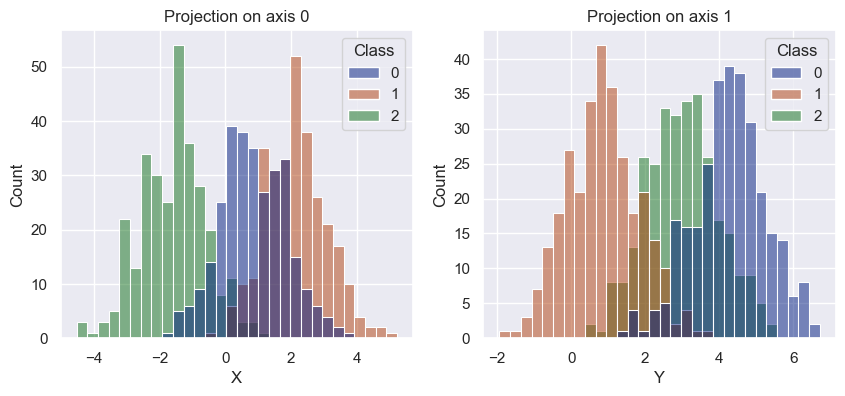

In [15]:
# your code goes here:
fig, axes = plt.subplots(1, 2, figsize=(10,4))
axes[0].set_title("Projection on axis 0")
axes[1].set_title("Projection on axis 1")
sns.histplot(ax=axes[0], data = plot_df2, x = "X", hue = "Class", bins = 30, palette = sns.color_palette("dark", 3))
sns.histplot(ax=axes[1], data = plot_df2, x = "Y", hue = "Class", bins = 30, palette = sns.color_palette("dark", 3))

## Exercise 2 - Linear Discriminant Analysis

* Use sklearn's implementation of LDA to project the points in a single dimension and then plot the projected data

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Remember that since we want to project our data onto a vector, the parameter n_components of `LinearDiscriminantAnalysis` should be set to 1

<Axes: xlabel='w_projection', ylabel='Count'>

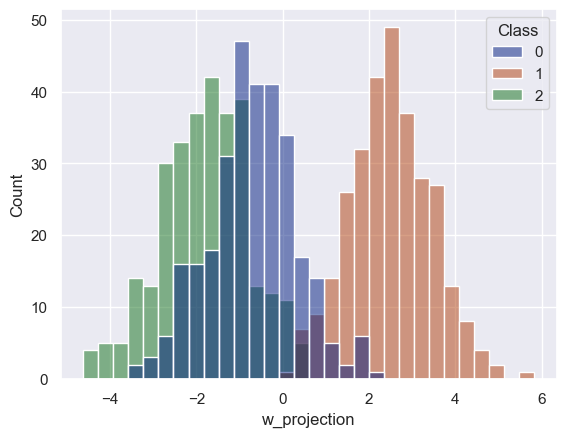

In [17]:
# your code goes here: 
fisher = LinearDiscriminantAnalysis(n_components=1)
fisher.fit(X2, y2)
w2_proj = fisher.transform(X2)

plot_df2["w_projection"] = w2_proj

sns.histplot(data = plot_df2, x = "w_projection", hue = "Class", bins = 30, palette = sns.color_palette("dark", 3))

## Exercise 3 - Calculate test set accuracy

* use the default parameters for the LDA classifier, and report the prediction accuracy on a train/test split of 70/30% (use `random_state=0`)
* report also the accuracy of the `RidgeClassfier` you used in Part I 

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# your code goes here:
# LDA
x2_train, x2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size=0.3)

fisher.fit(x2_train, y2_train)
prediction = fisher.predict(x2_test)
accuracy = accuracy_score(prediction, y2_test)
print("LDA Prediction: Accuracy =", accuracy)

# Ridge 
r.fit(x2_train, y2_train)
prediction = r.predict(x2_test)
accuracy = accuracy_score(prediction, y2_test)
print("Ridge Prediction: Accuracy =", accuracy)

LDA Prediction: Accuracy = 0.937037037037037
Ridge Prediction: Accuracy = 0.9259259259259259


# Part III - Logistic Regression for Binary Classification

## Exercise 1 - Load the dataset

* Load the diabetes dataset (`diabetes.csv`)
* Make a 70/30% train test partition of the dataset

*Suggestion:* I suggest you load it with pandas, but make a scikit-learn style dataset ($X$, $y$ numpy arrays)

In [20]:
# your code goes here:
diabetes_df = pd.read_csv('diabetes.csv')
x3 = diabetes_df.iloc[:, :-1].values
y3 = diabetes_df.iloc[:, -1].values

x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, random_state=0, test_size=0.3)

## Excercise 2 - Implementing Logistic Regression

* In this exercise you will implement the logistic regression algorithm to learn the vector of weights $\vec{w}$.
* You will then plot the ROC curve (using your implementation from the Tarefa), and calculate the AUROC (Area Under the ROC curve) using `sklearn.metrics.roc_auc_score()` for the testing set.

You can follow the structure for gradient descent as described in the previous labs and slides. Don't forget to write a function that calculates the sigmoid. You are not allowed in this exercise to use any existing functions.
* **Note that:** in the book and slides `y` is written as `t` and `y_hat` as `y`. 

Remember that $\nabla E(w) = \sum_{n=1}^N (y_n - t_n)\phi_n$ 

* _Tip:_ plot the loss during training to verify that everything is working properly.

In [38]:
# your code goes here:
def sig(a):
    return 1/(1 + np.exp(-a))

def log_regression_GD(X, t, max_iter = 10, apply_bias = True):
    if apply_bias:
        X = np.insert(X, 0, 1, axis = 1)
        
    # w = np.random.normal(0, 1, X.shape[1]) 
    # For some reason it doesn't work with a random starter like above, and I don't know why
    # I actually believe the problem here happens because python doesn't have enough precision to approximate the sigmoid results
    # So it makes sense why it generally doesn't work, but I don't know why it only WORKS with a null vector.... but it does :p 

    w = np.zeros(X.shape[1])
    
    ce_history = np.zeros(max_iter) # List to store the errors

    for epoch in range(max_iter):
        y = sig(X @ w) 
        
        R = np.diagflat(y*(1-y))
        z = X @ w - np.linalg.inv(R) @ (y - t)
        
        w = np.linalg.inv(X.T @ R @ X) @ X.T @ R @ z
    
        ce_history[epoch] = -np.sum(t*np.log(y) + (1-t)*np.log(1-y))

    return w, ce_history

def get_fpr_tpr(predicted_values, true_labels, threshold):
    prediction_vector = np.zeros(true_labels.size)
    tp, fp, tn, fn = 0, 0, 0, 0  
    
    for i in range(0, true_labels.size):
        if predicted_values[i] > threshold:
            prediction_vector[i] = 1

        if prediction_vector[i] > true_labels[i]: fp += 1
        elif prediction_vector[i] < true_labels[i]: fn += 1
        elif prediction_vector[i] == 1: tp += 1
        else: tn += 1

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn) 
    return fpr, tpr 

def roc_dataframe(predicted_values, true_labels):
    fpr_list = []
    tpr_list = []

    for datapoint in predicted_values:
        fpr, tpr = get_fpr_tpr(predicted_values, true_labels, datapoint)
        fpr_list.append(fpr)
        tpr_list.append(tpr)

    dataframe = pd.DataFrame({"FPR": fpr_list, "TPR": tpr_list})
    return dataframe

Evaluate the performance of your model, plot the ROC curve and calculate the AUROC

In [22]:
from sklearn.metrics import roc_auc_score

<Axes: >

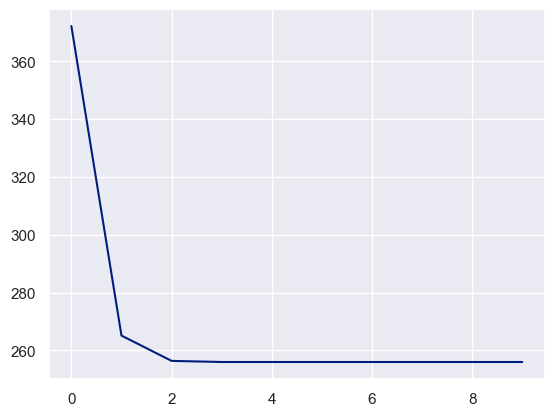

In [23]:
# your code goes here: 
w, ce = log_regression_GD(x3_train, y3_train) # Getting the w projection and the error
sns.lineplot(ce) # Plotting the error

<Axes: xlabel='FPR', ylabel='TPR'>

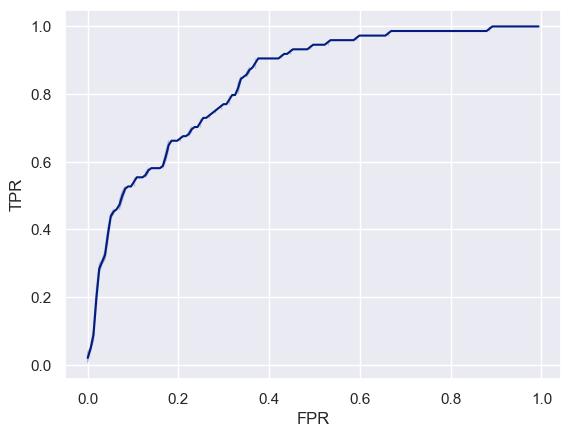

In [24]:
x3_test_biased = np.insert(x3_test, 0, 1, axis = 1)
pred3 = (x3_test_biased @ w)
plot_df3 = roc_dataframe(pred3, y3_test)

sns.lineplot(plot_df3, x="FPR", y="TPR") # Plotting the ROC curve

In [25]:
print("Auroc Score =", roc_auc_score(y3_test, pred3))

Auroc Score = 0.8355999311413325


# Part IV - Logistic Regression for multi-class classification

## Exercise 1 - Load the dataset
* Load the famous Iris dataset (using sklearn as shown below)
* Load the data in a matrix $X$ and the target in a vector $y$.
* Make a 70/30% train test partition of the dataset

In [26]:
from sklearn.datasets import load_iris

In [27]:
iris = load_iris()

Prepare $X$ and $y$

In [28]:
# your code goes here:
x4 = iris["data"]
y4 = iris["target"]

Split the data

In [29]:
# your code goes here:
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, random_state=0, test_size=0.3)

## Exercise 2 - Train the Logistic Regression model
Train your LogisticRegression multi-class classifier using the sklearn implementation. 
* To use the cross entropy loss function and softmax activation function, the `multi_class` parameter needs to be set to "multinomial"

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
# Let's create an instance of the LogisticRegression classifier for multiclass classification
lr_iris = LogisticRegression(multi_class='multinomial',solver='newton-cg')

Fit the data

In [32]:
# your code goes here: 
lr_iris.fit(x4_train, y4_train)

LogisticRegression(multi_class='multinomial', solver='newton-cg')

## Exercise 3 - Make predictions and evaluate the model
Use the `predict_proba()` method to obtain the output of the predictions for the testing set. The values are the output of the softmax activation function. 
* Remember that the highest value of each prediction corresponds to the actual predicted class.
* Write a function `get_predicted_class()` that transforms the vector of softmax outputs (obtained from `predict_proba()`) to a vector that just contains the predicted class. 
    - This function takes as input a matrix $\hat{Y}_{proba} \in \mathbb{R}^{m\times k}$ where $m$ is the number of samples in the testing set and $k$ is the number of classes.

As an example: if the softmax output is as follows: `Y_pred_sm = [[0.1,0.2,0.7], [0.4,0.3,0.3]]`, then `get_predicted_class(Y_pred_sm)` should return: `[2,0]` as the highest value for the 1st prediction is class 2 and for the 2nd prediction is class 0.

In [33]:
def get_predicted_class(Y_proba):
    # your code goes here:
    return np.argmax(Y_proba, axis=1)

In [34]:
# complete the input argument for the function to obtain the predictions for the testing set.
y_pred_sm = lr_iris.predict_proba(x4_test)
y_pred = get_predicted_class(y_pred_sm)

Now calculate the accuracy in the testing set using `y_pred`

In [35]:
# your code goes here:
acc = accuracy_score(y4_test, y_pred)
print("Logistic Regression Model Accuracy:", acc)

Logistic Regression Model Accuracy: 0.9777777777777777
